Linear regression
- Pedhazur's formula -- for SLR and for two-variable LR
- Moore-Penrose psuedoinverse
- Gradient descent

Polynomial regression
- Moore-Penrose pseudoinverse
- "Manual method" -- which happens to be really efficient

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 1

Polynomial regression using the pseudoinverse

In [2]:
data = "data/data04_1.csv"
df = pd.read_csv(data)

X, y = df.iloc[:, 1:-1].to_numpy(), df.iloc[:, -1].to_numpy() # converts to numpy arrays

Linear regression

In [3]:
theta = np.linalg.inv(X.T @ X) @ X.T @ y
predictions_lr = X @ theta

Polynomial regression

In [4]:
Xb = np.c_[np.ones_like(y), X, X**2] # this is literally the only change
theta = np.linalg.inv(Xb.T @ Xb) @ Xb.T @ y
predictions_pr = Xb @ theta

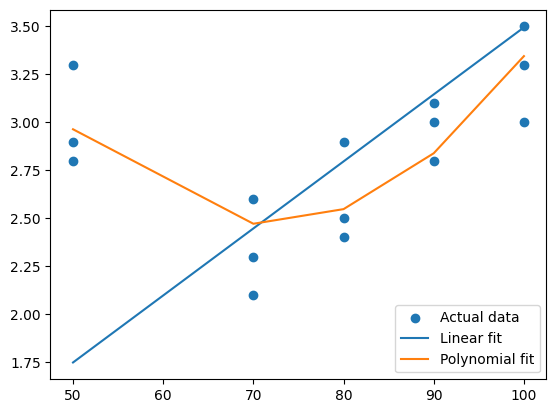

In [5]:
plt.scatter(X, y, label="Actual data")
plt.plot(X, predictions_lr, label="Linear fit")
plt.plot(X, predictions_pr, label="Polynomial fit")
plt.legend()

### Question 2

In [6]:
path = "data/data04_2.csv"
df = pd.read_csv(path)

features = ["Area", "X2", "X3"]
X, y = df[features].to_numpy(), df["Infarc"].to_numpy()

Xb = np.c_[np.ones_like(y), X]

In [7]:
theta = np.linalg.inv(Xb.T @ Xb) @ Xb.T @ y
predictions = Xb @ theta

In [11]:
e = (y - predictions) 
mse = np.mean(e ** 2)
rmse = np.sqrt(mse)

print(mse, rmse)

0.017028422624564204 0.13049299837372197


In [9]:
rss = np.sum(e ** 2)
tss = np.sum((y - y.mean()) ** 2)
r2 = 1 - rss / tss

print(r2)

0.6377369055921758
